In [8]:
import sys
import os
sys.path.append('../Functions/')

from importlib import reload
from group01 import Group01

In [9]:
test_obj = Group01("Test Object")
test_obj.get_data()

test_obj.df.head()

downloads directory already exists
data file already exists
reading data file into pandas dataframe...


,Entity,Year,tfp,output,inputs,ag_land_index,labor_index,capital_index,materials_index,output_quantity,...,ag_land_quantity,labor_quantity,capital_quantity,machinery_quantity,livestock_quantity,fertilizer_quantity,animal_feed_quantity,cropland_quantity,pasture_quantity,irrigation_quantity
0,Afghanistan,1961,65.0814,44.8285,68.8807,91.6812,44.5145,141.5215,35.9132,2566730,...,10571,1704,8866,5,6339,57345,2068912,7700,30000,2380
1,Afghanistan,1962,64.0637,45.6182,71.2075,92.2016,45.0207,163.6547,36.3829,2611942,...,10631,1723,10253,6,6228,58146,2082012,7760,30000,2380
2,Afghanistan,1963,61.6217,45.9729,74.6051,92.6352,45.5528,202.0577,37.0801,2632254,...,10681,1743,12659,8,6547,59694,2007829,7810,30000,2380
3,Afghanistan,1964,65.1109,49.0775,75.3752,93.1816,46.1108,203.8875,37.5294,2810010,...,10744,1765,12773,8,6732,60006,2140272,7873,30000,2380
4,Afghanistan,1965,63.8587,51.2121,80.1960,93.1990,46.6948,270.9746,38.5949,2932230,...,10746,1787,16976,12,6946,61821,2171226,7875,30000,2380


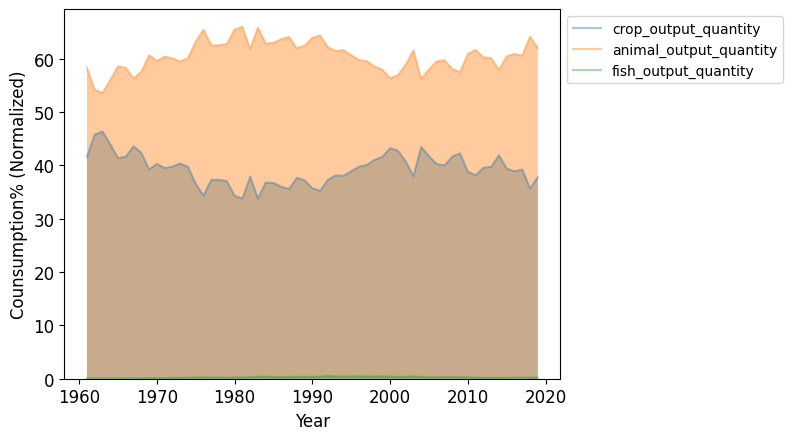

In [10]:
test_obj.plot_area_chart("Germany", True)